# Домашнее задание "Визуализация данных в Python"

### Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

### Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

- [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
- [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
- [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

## Работа

Я воспользовался возможностью выбрать свой датасет и взял:

[Отзывы о виски](https://www.kaggle.com/koki25ando/22000-scotch-whisky-reviews/downloads/22000-scotch-whisky-reviews.zip/1)

Какое-то время назад я работал бартендером и изучал культуру и методы производства алкоголя, включая Скотч Виски. Поэтому я постараюсь найти что-то интересное в своей аналитической работе.

In [1]:
import pandas as pd

df = pd.read_csv('scotch_review.csv')
print(f'shape: {df.shape}')

df.head(25)

shape: (2247, 7)


,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
5,6,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.00,$,"Powerful, muscular, well-textured, and invigor..."
6,7,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.00,$,Deep gold color. Surprisingly lively on the no...
7,8,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.00,$,"Definitely showing its age, but not in a bad w..."
8,9,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.00,$,The Dalmore is one of a handful of whiskies th...
9,10,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360,$,A rich amber color and elegantly oxidized note...


После первичной оценки данных мы видим, что данные представлены в виде 2247 записей, 7 колонок и образуют следующую структуру:
- **name** - название виски
- **category** - категория виски
- **review.point** - средняя оценка
- **price** - цена
- **currency** - валюта
- **description** - описание

После поверхностного изучения данных, я выявил следующие недостатки:
- нет колонки крепости
- колонка **"цена"** включает различные типы данных
- нет колонки года выдержки
- поля **description** и **currency** не представляет никакого интереса

####  Так же, таблица включает лишний столбец **Unnamed: 0**, который я хочу сделать индексом таблицы.

In [2]:
df = (
  df.drop(['description', 'currency'], axis=1)
  .rename(columns={'Unnamed: 0': 'id'})
  .set_index('id')
)
df.head()

,name,category,review.point,price
id,,,,
1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00
3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00
4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325
5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160


Теперь я хочу изменить цены всех позиций и представить их в виде числа с плавающей точкой

Для этого мне придётся отсеять все позиции, чьи цены нельзя преобразовать к числу, а потом у оставшихся изменить тип данных на **float**

In [3]:
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False
    
df = df[df.price.apply(is_numeric)].astype({'price': 'float64'})
print(f'shape: {df.shape}')

df.head()

shape: (2228, 4)


,name,category,review.point,price
id,,,,
1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0
3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0
4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0
5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0


Как мы видим, кол-во записей стало 2228 против 2247

Теперь пора добыть крепость позиций

In [4]:
percent_regex = '(\d{1,2}\.?\d{0,2}\%)'

df['proof(%)'] = (
  df.name.str.extract(percent_regex)
  .replace(to_replace=r'%', value='', regex=True)
  .astype('float64')
)

df.head()

,name,category,review.point,price,proof(%)
id,,,,,
1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,40.0
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,40.5
3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,42.9
4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,53.4
5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,40.0


In [5]:
year_old_regex = '(\d{0,2}? ?year old ?\d{0,2}?)'

df['yo'] = (
  df.name.str.extract(year_old_regex)
  .replace(to_replace=r'\D', value='', regex=True)
  .fillna(0)
  .astype('int64')
)

df.head()

,name,category,review.point,price,proof(%),yo
id,,,,,,
1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,40.0,0
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,40.5,42
3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,42.9,46
4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,53.4,0
5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,40.0,0


#### Здесь я хочу сделать важное замечание - срок выдержки отсутствует для многих позиций

### Подготовка данных закончена

Теперь я могу приступить к изучению данных и составлению списка метрик

Я начну аналитику с изложения некоторых знаний о виски. Это поможет создать причинно-следственную связь к моим метрикам.

Итак, виски - это крепкоалкогольный спиртной напиток, получаемый из зерновых культур. Традиционным Скотчем (Шотландским) виски считается напиток, произведённый из ячменного солода и только из него. Солод различают по вискокурням и весь виски можно поделить на категории:

- Single Malt Scotch, виски из ячменного солода, произведенного на одной вискокурне без добавления зерновых спиртов
- Blended Malt Scotch Whisky, виски произведённый на одной вискокурне, но из ячменного солода из нескольких мест без добавления зерновых спиртов
- Blended Scotch Whisky, купажированный виски, т.е. смесь различных спиртов, без сильного цензора
- Single Grain Whisky, виски из ячменного зерна с/без добавления спиртов из других зерновых культур
- Grain Scotch Whisky, купажированный виски, смесь различных зерновых спиртов


1. Так как качественное сырье сложнее и дороже производить, то цена и качество конечного продукта будет отличаться. В списке выше я расположил категории в порядке убывания качества и цены. Так нас учили и эту гипотезу я хочу проверить.


2. После производства спирта, виски выдерживают в дубовых бочках. Процесс выдержки занимает от 3х лет и продукт после выдержки может достигать 70% крепости. После этого, спирт разбавляют водой и разливают по бутылкам. Эта информация даст нам ещё несколько метрик, например, зависимость стоимости от И крепости И категории.


3. Срок выдержки делает вкус виски более насыщенным и тяжелым. Это позволит нам сравнить оценку и срок выдержки, оценку и крепость, учитывая/исключая стоимость.


#### Для начала, проверим список имеюшихся категорий в датасете

In [6]:
df.category.unique()

array(['Blended Scotch Whisky', 'Single Malt Scotch',
       'Blended Malt Scotch Whisky', 'Grain Scotch Whisky',
       'Single Grain Whisky'], dtype=object)

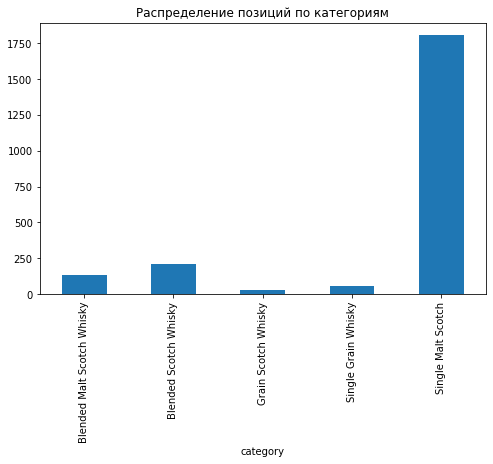

In [9]:
(
    df.groupby('category')
    .size()
    .plot(x='category', kind='bar', figsize=(8, 5), title='Распределение позиций по категориям')
)

В наших данных существуют все указанные выше категории.

Как видно из графика, в наших рейтингах преобладает категория **'Single Malt Scotch'**, за ней идёт **'Blended Scotch Whisky'**, потом **'Blended Malt Scotch Whisky'** и зерновые **(Grain)**. Шотландцы считают зерновой виски - пойлом, а сингл молт - лучшим виски, поэтому данные выглядят достоверными.

Теперь время подошло к проверке наших гипотез, по перед этим я хочу проверить данные на выборсы по критериям: 
- **"оценка"**, которая не может быть выше 100;
- **"крепость"**, которая не должна превышать 70%;
- **"срок выдержки"**, который должен быть в пределах разумного.

Итак, приступим к анализу данных

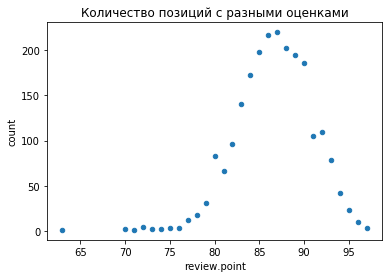

In [10]:
(
    df.groupby('review.point')
    .agg(count=('review.point', 'count'))
    .reset_index()
    .plot(x='review.point', y='count', kind='scatter', title='Количество позиций с разными оценками')
)

#### График показал:

- отсутствие выброса оценки выше 100 пунктов
- оценки распределяются нормально
- сильно отдалённых оценок от всех очень мало

Проверим последнее утверждение и исследуем срез с оценками < 65

In [11]:
pd.options.display.max_colwidth = 100
df[df['review.point'] < 65]

,name,category,review.point,price,proof(%),yo
id,,,,,,
2247,"Distillery Select 'Inchmoan' (distilled at Loch Lomond), Cask #151, 13 year old, 1992 vintage, 45%",Single Malt Scotch,63,60.0,45.0,13


Подобная позиция всего одна и это очень странно, что винтажный виски получил самую низкую оценку. Возможно его дегустировали, будучи в "зюзю".

Оставлю это как есть.

Следуюшим пунктом я проверю параметр "крепость"

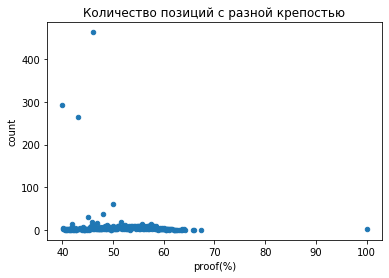

In [12]:
(
    df.groupby('proof(%)')
    .agg(count=('proof(%)', 'count'))
    .reset_index()
    .plot(x='proof(%)', y='count', kind='scatter', title='Количество позиций с разной крепостью')
)

На графике видно не равномерное распределение данных по параметру "количество позиций с заданной крепостью", но максимальное количество находится в пределах от 40 до 50 градусов, что похоже на правду.

Но данный график выявил выброс и указывает существование позиций с крепостью близкой или равной 100, что не является логичным. Посмотрим что это за данные и придумаем, что с ними делать.

In [13]:
df[df['proof(%)'] > 70]

,name,category,review.point,price,proof(%),yo
id,,,,,,
723,"Kilchoman 100% Islay 7th Edition, 50%",Single Malt Scotch,89,100.0,100.0,0
1138,"Kilchoman 100% Islay (distilled 2008, bottled 2011), 50%",Single Malt Scotch,87,100.0,100.0,0
1139,"Kilchoman 100% Islay 3rd Edition, 50%",Single Malt Scotch,87,92.0,100.0,0
1884,"Kilchoman 100% Islay 4th Edition, 59%",Single Malt Scotch,83,108.0,100.0,0


Найденные позиции с крепостью > 70% выявили ошибку в алгоритме получения крепости. Настоящая крепость была получена из другого значения и выявляет уязвимость в алгоритме получения крепости из названия.

К сожалению, сделать уникальным алгоритм определения крепости из названия не получится, но мы сможем наложить условие, что вырезаться будет 30% <= крепость <= 70% и получить более чистые значения.

Доработаем наш алгоритм:

shape: (2212, 6)


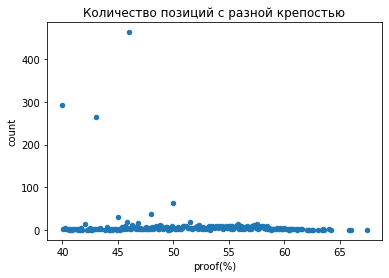

In [14]:
import numpy as np
import re

def extract_proof(string):
    percents = re.findall('\d+\.?\d{0,2}%', string)
    percents_values = np.array(list(map(
        lambda percent: float(percent.replace('%', '')),
        percents
    )))
    
    correct_percents = percents_values[(30 < percents_values) & (percents_values < 70)]
    
    return correct_percents[0] if len(correct_percents) else np.nan

df['proof(%)'] = df.name.apply(extract_proof)

df.dropna(inplace=True)
print('shape:', df.shape)

(
    df.groupby('proof(%)')
    .agg(count=('proof(%)', 'count'))
    .reset_index()
    .plot(x='proof(%)', y='count', kind='scatter', title='Количество позиций с разной крепостью')
)


Как видно на графике, выбросы исчезли. Количество записей сократилось с 2228 до 2212 из-за удаления позиций без указанной крепости. Следовательно, можно перейти к проверке следующего параметра - срока выдержки.

Я делал выше замечание о том, что срок выдержки есть не для всех позиций. Поэтому, я считаю, было бы целесообразным проверить, какое количество позиций имеют корректный срок выдержки.

Так же, я буду проводить дальнейшие исследования, завязанные на сроке выдержки, исключительно для отдельной выборки.

In [15]:
df_with_yo = df[df.yo > 0]

print('all:', df.shape)
print('with_yo:', df_with_yo.shape)

all: (2212, 6)
with_yo: (1178, 6)


Как видно выше, данные отличаются размером примерно в два раза. Проверим график срока выдержки на выбросы и аномалии:

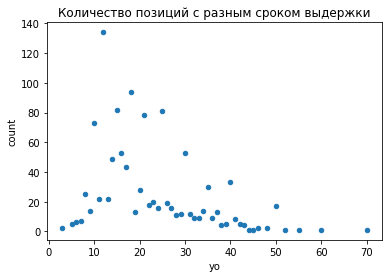

In [16]:
(
    df_with_yo
    .groupby('yo')
    .agg(count=('yo', 'count'))
    .reset_index()
    .plot(x='yo', y='count', kind='scatter', title='Количество позиций с разным сроком выдержки')
)

По графику видно, что виски от 10 до 30 лет выдержки сильнее всего преобладает во всём датасете. Пик составляют виски 10-15 лет выдержки. Это похоже на правду, т.к. самый популярный срок выдержки у Шотландцев ~ 12 лет.

#### Проверка гипотиз

Наконец то наши данные подготовленны и я могу начать проверять гипотизы.

Первое, с чего я начну, это проверка зависимости цены/рейтинга в зависимости от категории виски. Для этого отлично подойдёт столбчатая диаграма

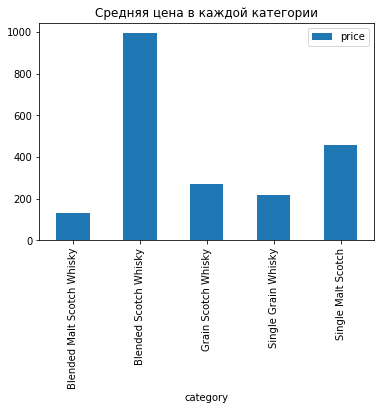

In [17]:
(
    df
    .groupby('category')
    .agg(price=('price', 'mean'))
    .reset_index()
    .plot(x='category', kind='bar', title='Средняя цена в каждой категории')
)

Судя по цене, наивысшая средняя цена у категории **'Blended Scotch Whisky'**. Постараемся разобраться, почему так. Посмотрим самые дорогие позиции для каждой из категорий.

In [18]:
(
    df.groupby('category')
    .agg(
        min_price=('price', 'min'),
        max_price=('price', 'max'),
    )
)

,min_price,max_price
category,,
Blended Malt Scotch Whisky,30.0,3378.0
Blended Scotch Whisky,12.0,157000.0
Grain Scotch Whisky,49.0,3108.0
Single Grain Whisky,22.0,1200.0
Single Malt Scotch,13.0,27620.0


Как видно из предыдущего списка, работать напряму с ценами, чтобы сделать какие-то выводы, нельзя в виду сильного разброса максимальных цен в категориях. Поэтому мне придётся сделать срез с ограничениями по цене.

Для комфортных вычислений, минимальную цену можно взять от 50$ за бутылку. Максимальную же придётся взять по минимальной из столбца **max_price** = 1200

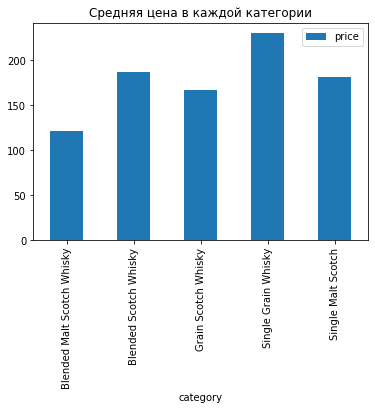

In [19]:
(
    df[(50 <= df.price) & (df.price <= 1200)]
    .groupby('category')
    .agg(price=('price', 'mean'))
    .reset_index()
    .plot(x='category', kind='bar', title='Средняя цена в каждой категории')
)

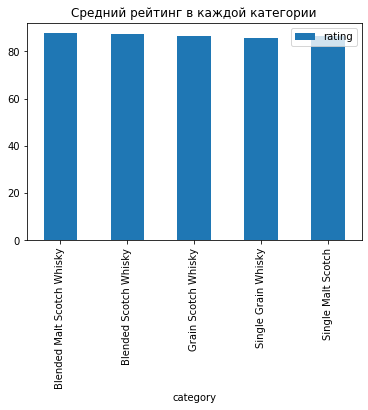

In [20]:
(
    df
    .groupby('category')
    .agg(rating=('review.point', 'mean'))
    .reset_index()
    .plot(x='category', kind='bar', title='Средний рейтинг в каждой категории')
)

#### Вывод:

Моя гипотиза, утверждающая, что наивысшая цена у виски категории **"Single Malt"** не подтверждена. Наивысшую цену имеет **"Blended Scotch"**, но эта цена за эксклюзивный виски.

После оценки усреднённых значений, график показал что наивысшая средняя цена у **"Single Grain"** категории, что удивительно, ведь это зерновой виски. Второе место приблизительно поровну поделили категории **"Single Malt"** и **"Blended"**.

Оценка среднего рейтинга дала ещё более интересный и неожиданный (для меня) результат. Средняя оценка всех категорий находится на одном уровне в пределах 86-88%.

Если честно, я удивлён! Столько лет я был убеждён, что именно Single Malt будет занимать высшие оценки по вкусовым качествам и стоить дороже, т.к. именно эта категория отражает традиции, что очень сильно ценится в шотландии...

Следующим шагом я хотел бы провести анализ зависимости сразу трёх показателей - цена, выдержка, оценка. Мне интересно проверить следующие критерии:
- зависимость крепости от срока выдержки
- зависимость цены от срока выдержки
- зависимость цены от крепости
- зависимость оценки от срока выдержки
- зависимость оценки от крепости

В умах многих людей сложилось впечатление о том, что чем выдержанее напиток, тем он благороднее. Чем благороднее напиток, тем больше он впечатляет людей. Чем больше впечатлений, тем выше оценка. Чем выше оценка, тем выше вкус. Продолжать можно до бесконечности, но лучше посмотреть своими глазами.

Демонстрация будет проводиться на срезе позиций, у которых присутствует срок выдержки.

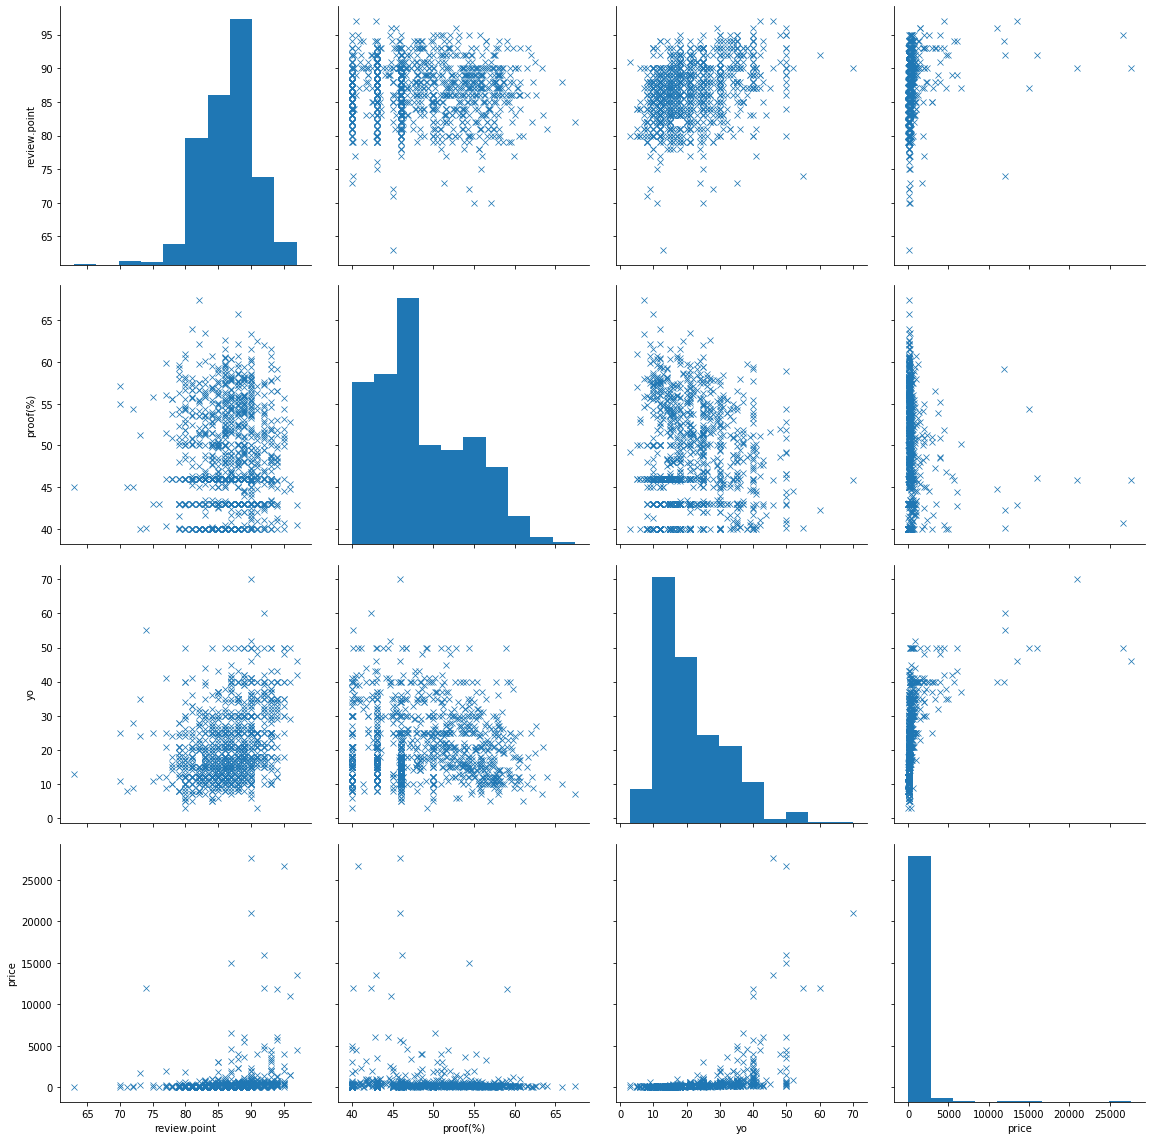

In [21]:
import seaborn as sns

sns_plot = sns.pairplot(
    df_with_yo[['review.point', 'proof(%)', 'yo', 'price']],
    markers='x',
    height=4,
)

sns_plot

Очень хотел найти, где бы мне пригодилась, и вот оно!

С данных графиков видно:
1. люди щедро раздавали хорошие оценки, основная масса оценок находится в пределе 80-90 баллов
1. наивысшие оценки получили спирты ~40-45 proof
1. высокие оценки (>90%) получали все виски с крепостью 40-64 proof
1. виски выше 65 proof получили оценки значительно ниже
1. самые низкие оценки (<75%) получили виски вне зависимости от крепости
1. самые высокие оценки получили виски с сроком выдержки 45-50 лет
1. наблюдается тенденция роста оценки в зависимости от роста срока выдержки
1. самые низкие оценки (<75%) получили виски вне зависимости от срока выдержки от 3 до 55 лет выдержки
1. самый популярный градус ~43-45%
1. крепость разделяется примерно поровну между 40-47% и 47-57%
1. самая популярная выдержка 10-18 лет
1. основная доля по выдержке приходится на виски 10-24 года
1. основная часть позиций стоит меньше 2000
1. почти все позиции дороже 2500 получили очень высокую оценку
1. виски за ~12000 может получить низкую оценку
1. крепость не влияет на стоимость
1. срок выдержки влияет на стоимость, но не обязательно линейно

Из сравнения всего 4 графиков мы получили информацию сразу по 17 раз личным пунктам.
- Эти данные подтверждают мою гипотизу, что более взрослые напитки имеют лучшую вкусокую гамму и, как следствие, самую высокую стоимость и оценку.
- Очень дорогой или выдержанный виски не обязательно понравится людям
- Люди любят не слишком крепкий виски
- Существуют очень хорошие, но не дорогие виски

На самом деле, можно сделать ещё много выводов из полученных данных, но этого, думаю, достаточно

Теперь максимум что я могу - проверить те же гипотезы на полном датасете, без учёта срока выдержки. Таким образом я смогу проверить все сделанные выводы на актуальность при увеличенном датасете в два раза.

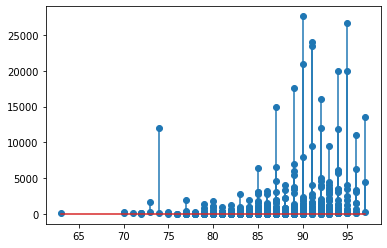

In [22]:
import matplotlib.pyplot as plt

# deleted price anomaly from dataset
df_normal_price = df[df.price < 100000]
plt.stem(
    df_normal_price['review.point'],
    df_normal_price['price'],
    use_line_collection=True,
)
plt.show()

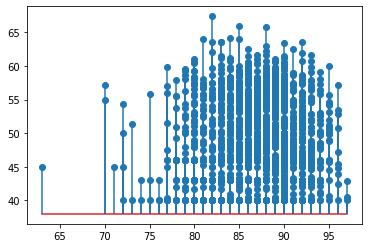

In [23]:
plt.stem(
    df['review.point'],
    df['proof(%)'],
    use_line_collection=True,
    bottom=38,
)
plt.show()

Изучив последние два графика, можно сделать следующие выводы:
- зависимость оценки от цены подтверждается
- зависимость оценки от крепости присутствует
- слишком крепкие позиции не имеют самой высокой оценки
- плотность оценов в диапозоне 45 <= крепость <= 57 наивысшая
- плотность не дорогих позиций в пределах оценок 90+ довольно высокая

Это подтверждает большинство гипотез, которые были основаны на анализе позиций, включая срок выдержки. Следовательно, я осмелюсь предположить, что остальные выводы для сокращённого датасета так же актуальны для полного датасета.

#### P.S. пятый тип графика, который требуется по заданию:

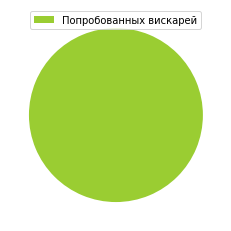

In [24]:
import matplotlib.pyplot as plt

patches, texts = plt.pie([df.price.agg('count')], colors=['yellowgreen'])
plt.legend(patches, ['Попробованных вискарей'], loc='upper center')

plt.show()

**Спасибо за внимание!**